# Employees Promotion Data Preparation Project

### About Dataset

The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.
So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.
Need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

### Objectives 

* Data Cleansing and Preparation 

### Data Dictionary

* employeeid: Unique ID for the employee 
* department: Department of employee 
* region: Region of employment (unordered) 
* education: Education Level 
* gender: Gender of Employee 
* recruitmentchannel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won: if awards won during the previous year 
* avg_ training_ score: Average score in current training evaluations
* is_promoted: Recommended for promotion

### Import Some Hepler Modules

In [2214]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [2215]:
from datasist.structdata import detect_outliers
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer , KNNImputer
from category_encoders import BinaryEncoder
from imblearn.under_sampling import RandomUnderSampler

In [2216]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'afmhot' , font_scale = 1 , 
              rc = {'figure.figsize' : (5,5)})

In [2217]:
%matplotlib inline

In [2218]:
warnings.filterwarnings('ignore')

In [2219]:
def Detect_Outlier(data , col):
    des = data[col].describe()
    IQR = des['75%'] - des['25%']
    minw , maxw = des['25%'] - (1.5 * IQR) , des['75%'] + (1.5 * IQR)
    otlier = data[(data[col] < minw) | (data[col] > maxw)].index
    return otlier

    
def Label_Encoding(col):
    le = LabelEncoder()
    col = pd.Series(data = le.fit_transform(col) , index = col.index)
    return col 


def Binary_Encoder(data , col):
    BE = BinaryEncoder()
    data = pd.concat([data , BE.fit_transform(data[[col]])] , axis = 1)
    data.drop([col] , axis = 1 , inplace = True)
    return data 


def One_Hot_Encoder(data , col):
    OHE = OneHotEncoder(sparse = False , drop = 'first')
    data = pd.concat([data , pd.DataFrame(OHE.fit_transform(data[[col]]) ,
                                          columns = OHE.get_feature_names_out())] , axis = 1)
    data.drop([col] , axis = 1 , inplace = True)
    return data



mapper = {'NO' : 0 , 'YES' : 1}

#### Read DataSet

In [2220]:
df = pd.read_csv('Employees Promotion V1.csv')

In [2221]:
df.head(3)

,EmployeeID,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score,Is Promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8,NO,49.0,NO
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4,NO,60.0,NO
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7,NO,50.0,NO


###### Drop Unneeded Columns

In [2222]:
df.drop(['EmployeeID'] , axis = 1 , inplace = True)

###### Split Data into train & test 

In [2223]:
x = df.drop(['Is Promoted'] , axis = 1)
y = df['Is Promoted']

In [2224]:
df['Is Promoted'].value_counts(normalize = True)*100

NO     91.482995
YES     8.517005
Name: Is Promoted, dtype: float64

In [2225]:
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 7 ,
                                                       stratify = y , test_size = 0.25)

In [2226]:
x_train.head()

,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score
17473,Procurement,region_23,Master's & above,m,other,1,37.0,2.0,3,NO,67.0
14343,Procurement,region_7,Master's & above,f,NaN,1,43.0,3.0,17,NO,74.0
48687,Finance,region_7,Bachelor's,m,other,1,31.0,5.0,7,NO,62.0
17261,Sales & Marketing,region_13,Master's & above,m,sourcing,1,30.0,4.0,2,NO,65.0
28493,HR,region_26,Bachelor's,m,sourcing,1,28.0,3.0,6,NO,49.0


In [2227]:
x_train.reset_index(inplace = True , drop = True)
x_test.reset_index(drop = True , inplace = True)
y_test.reset_index(inplace = True , drop = True)
y_train.reset_index(inplace = True , drop = True)

In [2228]:
x_train.head(3)

,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score
0,Procurement,region_23,Master's & above,m,other,1,37.0,2.0,3,NO,67.0
1,Procurement,region_7,Master's & above,f,NaN,1,43.0,3.0,17,NO,74.0
2,Finance,region_7,Bachelor's,m,other,1,31.0,5.0,7,NO,62.0


In [2229]:
x_test.head(3)

,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score
0,Finance,region_2,Bachelor's,m,other,1,25.0,NaN,1,YES,58.0
1,Sales & Marketing,region_11,Bachelor's,m,other,2,25.0,NaN,1,NO,49.0
2,Procurement,region_22,Master's & above,f,sourcing,1,31.0,5.0,6,NO,67.0


In [2230]:
y_train.value_counts(normalize = True)*100

NO     91.482995
YES     8.517005
Name: Is Promoted, dtype: float64

In [2231]:
y_test.value_counts(normalize = True)*100

NO     91.482995
YES     8.517005
Name: Is Promoted, dtype: float64

* stratify parameter save my percentage of Is Promoted in train & test (91%) NO to (8.5%) YES

In [2232]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((41106, 11), (41106,), (13702, 11), (13702,))

### Now Time For Preparing Our y_train & y_test 

In [2233]:
y_train.unique()

array(['NO', 'YES'], dtype=object)

#### Encode y_train , y_test  to (0 & 1) values
* uning lable encoding and mapper 

In [2234]:
y_train = Label_Encoding(y_train)

In [2235]:
y_train.unique()

array([0, 1])

In [2236]:
y_test = Label_Encoding(y_test)

In [2237]:
y_test.unique()

array([0, 1])

In [2238]:
x_train['Is Promoted'] = y_train
x_test['Is Promoted'] = y_test

### Deal With Missing values based on Percentage in each Feature 

<AxesSubplot:>

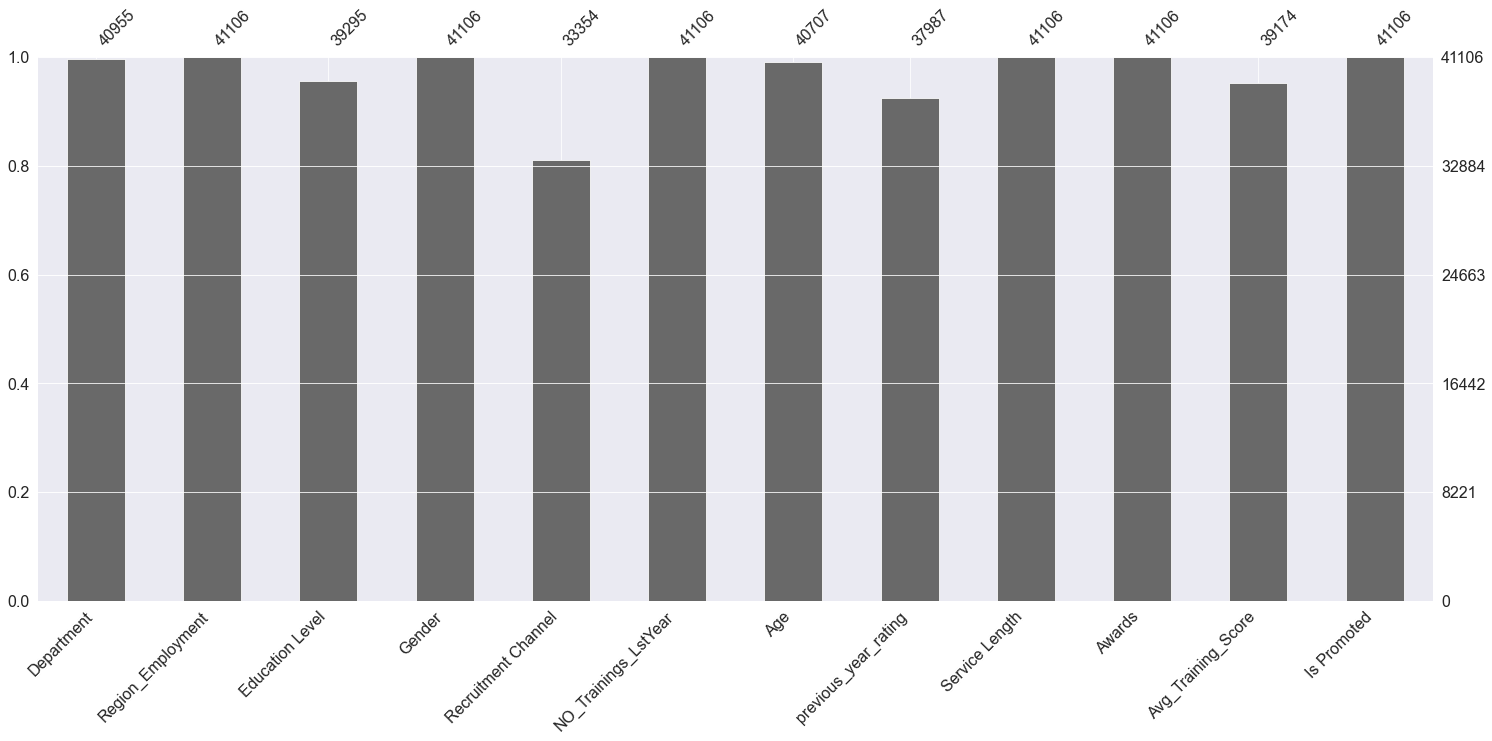

In [2239]:
msno.bar(x_train)

<AxesSubplot:>

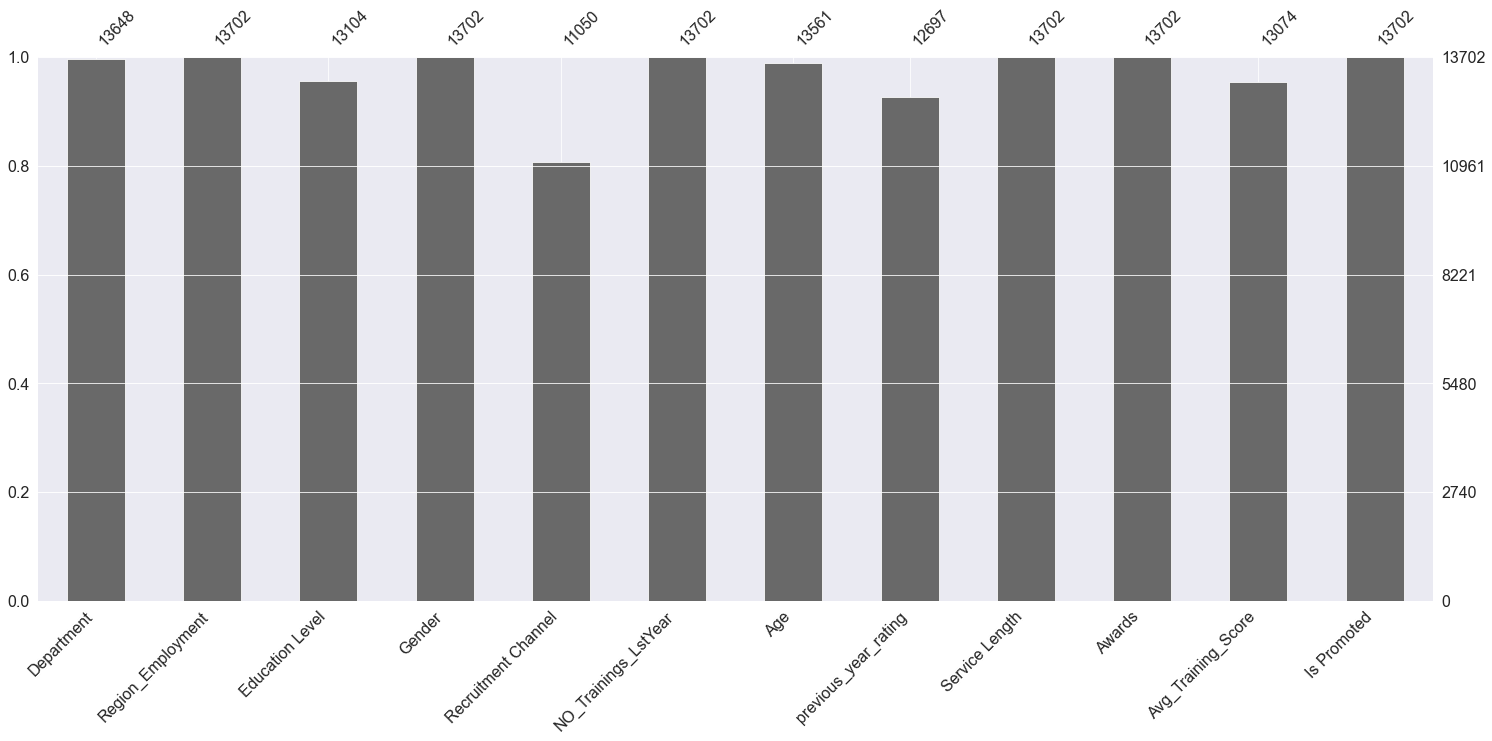

In [2240]:
msno.bar(x_test)

In [2241]:
round(x_train.isnull().mean()*100 , 2)

Department               0.37
Region_Employment        0.00
Education Level          4.41
Gender                   0.00
Recruitment Channel     18.86
NO_Trainings_LstYear     0.00
Age                      0.97
previous_year_rating     7.59
Service Length           0.00
Awards                   0.00
Avg_Training_Score       4.70
Is Promoted              0.00
dtype: float64

###### For X_train (categorical Feature):
* Department Feature Has (0.37%) missing  -- > drop this missing recordes 
* Education Level Feature Has (4.41%) missing  -- > drop this missing recordes 
* Recruitment Channel Feature (18.86%) missing  -- > impute this missing values with mode (most frequent )
* Age Feature Has (0.97%) missing -- > drop this missing recordes 
* previous_year_rating Feature Has (7.59%) impute this missing values with mode (most frequent )
* Avg_Training_Score Has (4.70%) drop this missing recordes 

* [Department , Education Level , Age , Avg_Training_Score] have small percentage of missing record so we can drop those records 

In [2242]:
x_train.dropna(subset = ['Department' , 'Education Level' , 'Age' , 'Avg_Training_Score'] , 
              axis = 0 , inplace = True)

In [2243]:
x_train.shape

(36939, 12)

In [2244]:
x_train.isnull().mean()*100

Department               0.000000
Region_Employment        0.000000
Education Level          0.000000
Gender                   0.000000
Recruitment Channel     18.874360
NO_Trainings_LstYear     0.000000
Age                      0.000000
previous_year_rating     7.160454
Service Length           0.000000
Awards                   0.000000
Avg_Training_Score       0.000000
Is Promoted              0.000000
dtype: float64

In [2245]:
x_train['Recruitment Channel'].unique() # categorical column fill na with mode 

array(['other', nan, 'sourcing', 'referred'], dtype=object)

In [2246]:
imputer = SimpleImputer(strategy = 'most_frequent') 

In [2247]:
x_train['Recruitment Channel'] = imputer.fit_transform(x_train[['Recruitment Channel']])

In [2248]:
x_train['previous_year_rating'].unique()

array([ 2.,  3.,  5.,  4.,  1., nan])

* previous_year_rating is numerical feature but not continuos it is descrete values (1 to 5) so will fill nan with mode 

In [2249]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [2250]:
x_train['previous_year_rating'] = imputer.fit_transform(x_train[['previous_year_rating']])

In [2251]:
x_train.isnull().mean()*100

Department              0.0
Region_Employment       0.0
Education Level         0.0
Gender                  0.0
Recruitment Channel     0.0
NO_Trainings_LstYear    0.0
Age                     0.0
previous_year_rating    0.0
Service Length          0.0
Awards                  0.0
Avg_Training_Score      0.0
Is Promoted             0.0
dtype: float64

In [2252]:
round(x_test.isnull().mean()*100 , 2)

Department               0.39
Region_Employment        0.00
Education Level          4.36
Gender                   0.00
Recruitment Channel     19.35
NO_Trainings_LstYear     0.00
Age                      1.03
previous_year_rating     7.33
Service Length           0.00
Awards                   0.00
Avg_Training_Score       4.58
Is Promoted              0.00
dtype: float64

###### For X_test (categorical Feature)
* Department Feature Has (0.39%) missing  -- > drop this missing recordes 
* Education Level Feature Has (4.36%) missing  -- > drop this missing recordes 
* Recruitment Channel Feature (19.35%) missing  -- > impute this missing values with mode (most frequent ) 
* Age Feature Has (1.03%) missing -- > drop this missing recordes 
* previous_year_rating Feature Has (7.33%)impute this missing values with mode (most frequent ) 
* Avg_Training_Score Feature Has (4.58%) missing -- > drop this missing recordes 

* [Department , Education Level , Age , Avg_Training_Score] have small percentage of missing record so we can drop those records 

In [2253]:
x_test.dropna(subset = ['Department' , 'Education Level' , 'Age' , 'Avg_Training_Score'] , 
             axis = 0 , inplace = True)

In [2254]:
x_test.shape

(12327, 12)

In [2255]:
x_test.isnull().mean()*100

Department               0.000000
Region_Employment        0.000000
Education Level          0.000000
Gender                   0.000000
Recruitment Channel     19.355885
NO_Trainings_LstYear     0.000000
Age                      0.000000
previous_year_rating     6.919770
Service Length           0.000000
Awards                   0.000000
Avg_Training_Score       0.000000
Is Promoted              0.000000
dtype: float64

In [2256]:
x_test['Recruitment Channel'].unique() # categorical column fill na with mode 

array(['other', 'sourcing', nan, 'referred'], dtype=object)

In [2257]:
imputer = SimpleImputer(strategy = 'most_frequent') 

In [2258]:
x_test['Recruitment Channel'] = imputer.fit_transform(x_test[['Recruitment Channel']])

In [2259]:
x_test['previous_year_rating'].unique()

array([nan,  5.,  1.,  4.,  3.,  2.])

* previous_year_rating is numerical feature but not continuos it is descrete values (1 to 5) so will fill nan with mode 

In [2260]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [2261]:
x_test['previous_year_rating'] = imputer.fit_transform(x_test[['previous_year_rating']])

In [2262]:
x_test.isnull().mean()*100

Department              0.0
Region_Employment       0.0
Education Level         0.0
Gender                  0.0
Recruitment Channel     0.0
NO_Trainings_LstYear    0.0
Age                     0.0
previous_year_rating    0.0
Service Length          0.0
Awards                  0.0
Avg_Training_Score      0.0
Is Promoted             0.0
dtype: float64

In [2263]:
x_train.reset_index(drop = True , inplace = True)
x_test.reset_index(drop = True , inplace = True)

### NOW Time For Encoding Our Categorical Feature X_train & X_test

In [2264]:
x_train_cat = x_train.select_dtypes('object_')
x_train_num = x_train.select_dtypes('number')

In [2265]:
x_test_cat = x_test.select_dtypes('object_')
x_test_num = x_test.select_dtypes('number')

In [2266]:
x_train_cat.head(3)

,Department,Region_Employment,Education Level,Gender,Recruitment Channel,Awards
0,Procurement,region_23,Master's & above,m,other,NO
1,Procurement,region_7,Master's & above,f,other,NO
2,Finance,region_7,Bachelor's,m,other,NO


In [2267]:
x_test_cat.head(3)

,Department,Region_Employment,Education Level,Gender,Recruitment Channel,Awards
0,Finance,region_2,Bachelor's,m,other,YES
1,Sales & Marketing,region_11,Bachelor's,m,other,NO
2,Procurement,region_22,Master's & above,f,sourcing,NO


##### Department Feature X_train & X_test

In [2268]:
x_train_cat['Department'].unique()

array(['Procurement', 'Finance', 'Sales & Marketing', 'HR', 'Technology',
       'Operations', 'Legal', 'R&D', 'Analytics'], dtype=object)

In [2269]:
x_train_cat['Department'].nunique()

9

* Has 9 Category if we use one hot encoding we get new 9 columns we can improve it by drop first one or any of them but still big number of columns so we use binary encoding we have 9 category will represent into 4 columns 

In [2270]:
x_train_cat = Binary_Encoder(x_train_cat , 'Department')

In [2271]:
x_train_cat.head(2)

,Region_Employment,Education Level,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3
0,region_23,Master's & above,m,other,NO,0,0,0,1
1,region_7,Master's & above,f,other,NO,0,0,0,1


In [2272]:
x_test_cat = Binary_Encoder(x_test_cat , 'Department')

In [2273]:
x_test_cat.head(2)

,Region_Employment,Education Level,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3
0,region_2,Bachelor's,m,other,YES,0,0,0,1
1,region_11,Bachelor's,m,other,NO,0,0,1,0


###### Region Emplyment X_train , X_test

In [2274]:
x_train_cat['Region_Employment'].unique()

array(['region_23', 'region_7', 'region_13', 'region_26', 'region_11',
       'region_22', 'region_2', 'region_12', 'region_15', 'region_9',
       'region_24', 'region_4', 'region_29', 'region_21', 'region_31',
       'region_20', 'region_27', 'region_1', 'region_19', 'region_16',
       'region_8', 'region_25', 'region_34', 'region_17', 'region_14',
       'region_28', 'region_30', 'region_10', 'region_3', 'region_33',
       'region_6', 'region_5', 'region_32', 'region_18'], dtype=object)

In [2275]:
x_train_cat['Region_Employment'].nunique()

34

Has 34 Category if we use one hot encoding we get new 34 columns we can improve it by drop first one or any of them but still big number of columns so we use binary encoding we have 34 category will represent into 6 columns instead 

In [2276]:
x_train_cat = Binary_Encoder(x_train_cat , 'Region_Employment')

In [2277]:
x_train_cat.head(2)

,Education Level,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5
0,Master's & above,m,other,NO,0,0,0,1,0,0,0,0,0,1
1,Master's & above,f,other,NO,0,0,0,1,0,0,0,0,1,0


In [2278]:
x_test_cat = Binary_Encoder(x_test_cat , 'Region_Employment')

In [2279]:
x_test_cat.head(2)

,Education Level,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5
0,Bachelor's,m,other,YES,0,0,0,1,0,0,0,0,0,1
1,Bachelor's,m,other,NO,0,0,1,0,0,0,0,0,1,0


###### Education Level Feature X_train & X_test

In [2280]:
x_train_cat['Education Level'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [2281]:
x_train_cat['Education Level'].nunique()

3

* Has 3 category can represent into 2 columns in binary encoding and can encoded by one hot encoder into 2 columns by drop any of them 
* So we will use One Hot Encoding 

In [2282]:
x_train_cat = One_Hot_Encoder(x_train_cat , 'Education Level')

In [2283]:
x_train_cat.head(2)

,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above
0,m,other,NO,0,0,0,1,0,0,0,0,0,1,0.0,1.0
1,f,other,NO,0,0,0,1,0,0,0,0,1,0,0.0,1.0


In [2284]:
x_test_cat = One_Hot_Encoder(x_test_cat , 'Education Level')

In [2285]:
x_test_cat.head(2)

,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above
0,m,other,YES,0,0,0,1,0,0,0,0,0,1,0.0,0.0
1,m,other,NO,0,0,1,0,0,0,0,0,1,0,0.0,0.0


###### Gender Feature X_train & X_test

In [2286]:
x_train_cat['Gender'].unique()

array(['m', 'f'], dtype=object)

In [2287]:
x_train_cat['Gender'] = x_train_cat['Gender'].apply(lambda x : 1 if x == 'm' else 0)

In [2288]:
x_train_cat.head(2)

,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above
0,1,other,NO,0,0,0,1,0,0,0,0,0,1,0.0,1.0
1,0,other,NO,0,0,0,1,0,0,0,0,1,0,0.0,1.0


In [2289]:
x_test_cat['Gender'] = x_test_cat['Gender'].apply(lambda x : 1 if x == 'm' else 0)

In [2290]:
x_test_cat.head(2)

,Gender,Recruitment Channel,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above
0,1,other,YES,0,0,0,1,0,0,0,0,0,1,0.0,0.0
1,1,other,NO,0,0,1,0,0,0,0,0,1,0,0.0,0.0


##### Recruitment Channel Feature X_train & X_test

In [2291]:
x_train_cat['Recruitment Channel'].unique()

array(['other', 'sourcing', 'referred'], dtype=object)

* Has 3 category can represent into 2 columns in binary encoding and can encoded by one hot encoder into 2 columns by drop any of them 
* So we will use One Hot Encoding 

In [2292]:
x_train_cat = One_Hot_Encoder(x_train_cat , 'Recruitment Channel')

In [2293]:
x_train_cat.head(2)

,Gender,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above,Recruitment Channel_referred,Recruitment Channel_sourcing
0,1,NO,0,0,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0
1,0,NO,0,0,0,1,0,0,0,0,1,0,0.0,1.0,0.0,0.0


In [2294]:
x_test_cat = One_Hot_Encoder(x_test_cat , 'Recruitment Channel')

In [2295]:
x_test_cat.head(2)

,Gender,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above,Recruitment Channel_referred,Recruitment Channel_sourcing
0,1,YES,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0
1,1,NO,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0


###### Awardes Feature X_train & x_test

In [2296]:
x_train_cat['Awards'].unique()

array(['NO', 'YES'], dtype=object)

In [2297]:
x_train_cat['Awards'] = x_train_cat['Awards'].map(mapper)

In [2298]:
x_train_cat['Awards'].unique()

array([0, 1], dtype=int64)

In [2299]:
x_train_cat.head(2)

,Gender,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above,Recruitment Channel_referred,Recruitment Channel_sourcing
0,1,0,0,0,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0
1,0,0,0,0,0,1,0,0,0,0,1,0,0.0,1.0,0.0,0.0


In [2300]:
x_test_cat['Awards'] = x_test_cat['Awards'].map(mapper)

In [2301]:
x_test_cat.head(2)

,Gender,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,Region_Employment_4,Region_Employment_5,Education Level_Below Secondary,Education Level_Master's & above,Recruitment Channel_referred,Recruitment Channel_sourcing
0,1,1,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0
1,1,0,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0


### Prepare Numerical Columns For X_train & X_test
* Outliers Point

In [2302]:
x_train_num.columns

Index(['NO_Trainings_LstYear', 'Age', 'previous_year_rating', 'Service Length',
       'Avg_Training_Score', 'Is Promoted'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

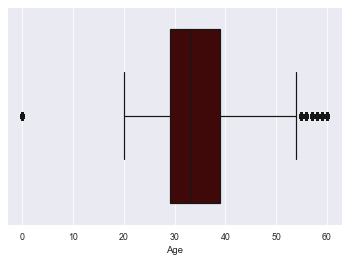

In [2303]:
sns.boxplot(data = x_train_num , x = 'Age')

* For Age Feature there was values 0 !! , we can fix it by median point

In [2304]:
x_train_num[ x_train_num['Age'] == 0].shape[0]

237

In [2305]:
idx = x_train_num[ x_train_num['Age'] == 0].index

In [2306]:
x_train_num['Age'].loc[idx] = x_train_num['Age'].median()

<AxesSubplot:xlabel='Age'>

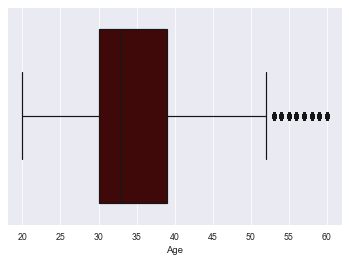

In [2307]:
sns.boxplot(data = x_train_num , x = 'Age')

In [2308]:
outlier_idx = Detect_Outlier(x_train_num , 'Age')

In [2309]:
x_train_num['Age'].loc[outlier_idx].unique()

array([57., 55., 54., 59., 53., 60., 58., 56.])

* Age with these values no outlier or strange values so keep it 

In [2310]:
x_train_num['Service Length'].unique()

array([ 3, 17,  7,  2,  6,  4,  1,  5, 10,  9,  8, 15, 11, 16, 13, 25, 12,
       20, 19, 22, 18, 14, 21, 24, 23, 29, 27, 34, 28, 31, 26, 30, 32, 33,
       37], dtype=int64)

<AxesSubplot:xlabel='Service Length'>

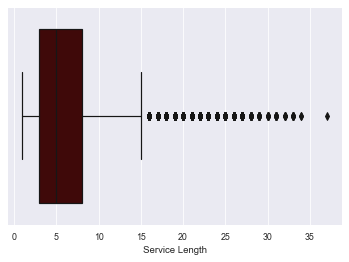

In [2311]:
sns.boxplot(data = x_train_num , x = 'Service Length')

In [2312]:
outlier_idx = Detect_Outlier(x_train_num , 'Service Length')

In [2313]:
x_train_num[x_train_num['Service Length'] > 35]

,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score,Is Promoted
17667,2,60.0,5.0,37,48.0,0


In [2314]:
x_train_num.loc[outlier_idx]

,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score,Is Promoted
1,1,43.0,3.0,17,74.0,0
30,1,45.0,3.0,17,72.0,0
67,1,47.0,2.0,16,81.0,0
122,1,43.0,3.0,16,87.0,0
164,1,54.0,1.0,25,46.0,0
...,...,...,...,...,...,...
36782,1,50.0,5.0,19,57.0,0
36783,2,50.0,1.0,19,46.0,0
36885,1,55.0,4.0,18,68.0,0
36895,1,58.0,5.0,16,72.0,1


* Based on Age feature thes values of service length is logic so keep it too

In [2315]:
len(Detect_Outlier(x_train_num , 'Avg_Training_Score'))

0

<AxesSubplot:xlabel='Avg_Training_Score'>

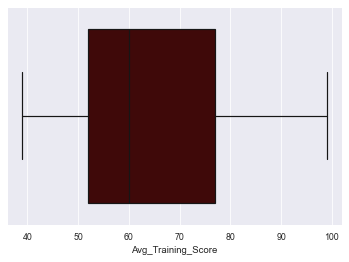

In [2316]:
sns.boxplot(data = x_train_num , x = 'Avg_Training_Score')

* Has NO Outlier Points 

In [2317]:
x_test_num['Age'].unique()

array([25., 31., 45., 34., 35., 33., 28., 29., 47., 46., 38., 40., 48.,
       24., 32., 44., 58., 51., 30., 42., 43., 27., 26., 52., 36., 41.,
       57., 49., 39., 23., 54., 37., 50., 55., 59., 56., 22.,  0., 53.,
       60., 21., 20.])

<AxesSubplot:xlabel='Age'>

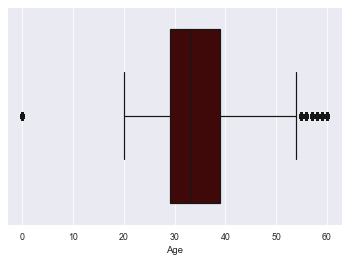

In [2318]:
sns.boxplot(data = x_test_num , x = 'Age')

* As x_train age with 0 values !! 

In [2319]:
idx0 = x_test_num[x_test_num['Age'] == 0].index

In [2320]:
x_test_num['Age'].loc[idx0] = x_test_num['Age'].median()

<AxesSubplot:xlabel='Age'>

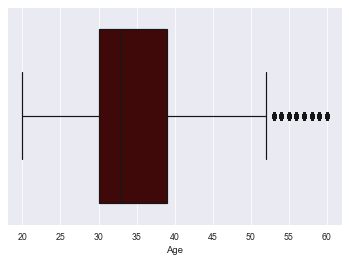

In [2321]:
sns.boxplot(data = x_test_num , x = 'Age')

* other outlier values is logical values and make and variance in our data so keep it too 

<AxesSubplot:xlabel='Avg_Training_Score'>

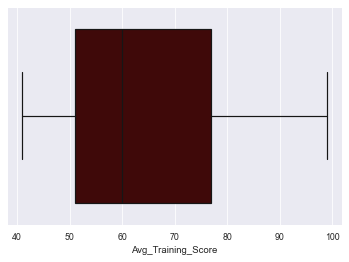

In [2322]:
sns.boxplot(data = x_test_num , x = 'Avg_Training_Score')

* NO Outlier Points 

<AxesSubplot:xlabel='Service Length'>

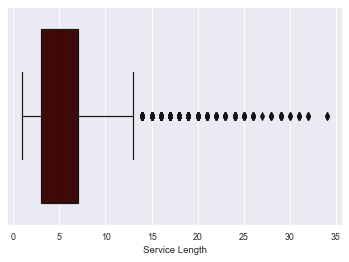

In [2323]:
sns.boxplot(data = x_test_num , x = 'Service Length')

In [2324]:
otlr_idx = Detect_Outlier(x_test_num , 'Service Length')

In [2325]:
x_test_num.loc[otlr_idx]

,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score,Is Promoted
9,1,47.0,4.0,15,58.0,0
17,1,48.0,5.0,20,51.0,0
36,1,43.0,3.0,16,49.0,0
39,1,52.0,4.0,15,77.0,0
41,1,47.0,3.0,17,48.0,0
...,...,...,...,...,...,...
12265,1,58.0,4.0,26,71.0,0
12303,1,45.0,5.0,14,56.0,0
12304,1,48.0,1.0,19,48.0,0
12306,2,50.0,3.0,17,50.0,0


* other outlier values is logical values and make and variance in our data

### NOW We Complete our Data Preprocessing 
* combine categorical and numerical columns for train & test

In [2326]:
x_train = pd.concat([x_train_cat , x_train_num] , axis = 1)

In [2327]:
x_train.head(3)

,Gender,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,...,Education Level_Below Secondary,Education Level_Master's & above,Recruitment Channel_referred,Recruitment Channel_sourcing,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score,Is Promoted
0,1,0,0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,1,37.0,2.0,3,67.0,0
1,0,0,0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,1,43.0,3.0,17,74.0,0
2,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1,31.0,5.0,7,62.0,0


In [2328]:
x_test = pd.concat([x_test_cat , x_test_num] , axis = 1)

In [2329]:
x_test.head(3)

,Gender,Awards,Department_0,Department_1,Department_2,Department_3,Region_Employment_0,Region_Employment_1,Region_Employment_2,Region_Employment_3,...,Education Level_Below Secondary,Education Level_Master's & above,Recruitment Channel_referred,Recruitment Channel_sourcing,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score,Is Promoted
0,1,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1,25.0,3.0,1,58.0,0
1,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,2,25.0,3.0,1,49.0,0
2,0,0,0,0,1,1,0,0,0,0,...,0.0,1.0,0.0,1.0,1,31.0,5.0,6,67.0,1


In [2330]:
#x_train.to_csv('train.csv' , index = False)
#x_test.to_csv('test.csv' , index = False)

In [2331]:
y_train = x_train['Is Promoted']
x_train.drop(['Is Promoted'] , axis = 1 , inplace = True)

In [2332]:
y_test = x_test['Is Promoted']
x_test.drop(['Is Promoted'] , axis = 1 , inplace = True)

#### For our lable feature or class (Is Promoted) we find that it is imbalanced class !!

In [2333]:
y_train.value_counts(normalize = True)*100

0    91.239611
1     8.760389
Name: Is Promoted, dtype: float64

###### we have 2 choices UnderSampling , OverSampling 
* we will performe undersampling

In [2334]:
x_train.shape , y_train.shape

((36939, 21), (36939,))

In [2335]:
random_sampler = RandomUnderSampler(random_state = 3)

In [2336]:
x_train , y_train = random_sampler.fit_resample(x_train , y_train)

In [2337]:
x_train.shape

(6472, 21)

In [2338]:
y_train.value_counts(normalize = True)*100

0    50.0
1    50.0
Name: Is Promoted, dtype: float64